# Setup

In [1]:
"""
Add parent directorys to current path
"""
import os.path
import sys


for p in ['..', '../..', '../../..', '../../../..']:
    d = os.path.abspath(p)
    if d not in sys.path:
        sys.path.insert(0,d)

        
"""
Add tiger-env directory to current path
Still not sure why this is needed.
"""
d = [os.path.abspath('../../../../../custom_envs/gym-tiger'),
    os.path.abspath('../../../../../custom_envs/gym-dummy/')]
for _d in d:
    if _d not in sys.path:
        sys.path.insert(0, _d)


"""
Enable hot-reloading
"""    
from notebook_utils import import_module_by_name, reload_module_by_name


def reload():
    """Helper function for hot-reloading QLearnerObsSeq class from source"""
    reload_module_by_name(
        'experiments.qlearning.basic.qlearner_obs_seq.qlearner_obs_seq',
        'QLearnerObsSeq')
    global QLearnerObsSingle
    from experiments.qlearning.basic.qlearner_obs_seq.qlearner_obs_seq \
        import QLearnerObsSeq

# Tiger-v0

## Setup ENV and Model

In [7]:
import gym
import gym_tiger
import matplotlib.pyplot as plt
from experiments.qlearning.basic.utils import play_one, plot_running_avg
from experiments.qlearning.basic.qlearner_obs_seq.qlearner_obs_seq \
    import QLearnerObsSeq
from experiments.qlearning.basic.qlearner_obs_seq.feature_transformer \
    import SeqFeatureTransformer

env = gym.make('Tiger-v0')
env.__init__(reward_tiger=-100, reward_gold=10, reward_listen=-1,
             max_steps_per_episode=500)

seq_len=2

ft = SeqFeatureTransformer()

model = QLearnerObsSeq(env, ft, initial_alpha=.5, gamma=.9, alpha_decay=.4, seq_len=seq_len)
eps = 1
n = 0
done = False
ot = env.reset()

## Take one action and update Q

$$
Q(s_{t-1}, a_{t-1}) = Q(s_{t-1}, a_{t-1}) + \alpha \big[ r_t + \gamma \cdot Q(s_t, a_t) - Q(s_{t-1}, a_{t-1}) \big]
$$

In [3]:
if done:
    ot = env.reset()
# print(str(model))
otm1 = ot
atm1 = model.sample_action(otm1, eps)
ot, r, done, info = env.step(atm1)
at = model.best_action(ot)
model.update(otm1, atm1, r, ot, at)
_otm1 = env.translate_obs(otm1)
_atm1 = env.translate_action(atm1)
print(_otm1, ',', _atm1, ',', r)
print(str(model))

START , OPEN_LEFT , -100

Previous Observations      OPEN_LEFT    OPEN_RIGHT    LISTEN
-----------------------  -----------  ------------  --------
['GROWL_LEFT']                     0             0         0
['START']                        -50             0         0
['START', 'GROWL_LEFT']            0             0         0



## Play 1 Episode (100 steps)

In [4]:
print(str(model))
play_one(env, model, eps, verbose=True)
print(str(model))


Previous Observations      OPEN_LEFT    OPEN_RIGHT    LISTEN
-----------------------  -----------  ------------  --------
['GROWL_LEFT']                     0             0         0
['START']                        -50             0         0
['START', 'GROWL_LEFT']            0             0         0

o_t-n,...,o_t-1                                 | o_t-1       | a_t-1      | r     | o_t         | a_t       
----------------------------------------------------------------------------------------------------
['START', 'START']                              | START       | OPEN_RIGHT | -100  | GROWL_RIGHT | OPEN_LEFT 
['START', 'GROWL_RIGHT']                        | GROWL_RIGHT | OPEN_LEFT  | 10    | GROWL_RIGHT | OPEN_LEFT 
['GROWL_RIGHT', 'GROWL_RIGHT']                  | GROWL_RIGHT | OPEN_RIGHT | 10    | GROWL_LEFT  | OPEN_LEFT 
['GROWL_RIGHT', 'GROWL_LEFT']                   | GROWL_LEFT  | OPEN_RIGHT | 10    | GROWL_LEFT  | OPEN_LEFT 
['GROWL_LEFT', 'GROWL_LEFT']              

## Play 100 Episodes


Previous Observations                            OPEN_LEFT  OPEN_RIGHT    LISTEN
---------------------------------------------  -----------  ------------  --------
['GROWL_RIGHT', 'GROWL_RIGHT', 'GROWL_RIGHT']       -26.88  -52.9         -3.29 <<
['GROWL_RIGHT', 'GROWL_RIGHT', 'GROWL_LEFT']        -32.2   -40.55        -5.45 <<
['GROWL_RIGHT', 'GROWL_RIGHT', 'GROWL_RIGHT']       -26.88  -52.9         -3.29 <<
['GROWL_RIGHT', 'GROWL_LEFT', 'GROWL_RIGHT']        -36.38  -5.23 <<      -15.03
['GROWL_LEFT', 'GROWL_RIGHT', 'GROWL_RIGHT']        -23.5   -45.7         -2.29 <<
['GROWL_LEFT', 'GROWL_RIGHT', 'GROWL_LEFT']         -35.85  -32.55        -6.96 <<
['GROWL_RIGHT', 'GROWL_LEFT', 'GROWL_LEFT']         -50.61  -28.64        -4.82 <<
['GROWL_LEFT', 'GROWL_LEFT', 'GROWL_LEFT']          -62.67  -19.29        -1.68 <<
['GROWL_LEFT', 'GROWL_LEFT', 'GROWL_RIGHT']         -27.18  -48.17        -1.88 <<


Previous Observations                            OPEN_LEFT    OPEN_RIGHT  LISTEN
-------

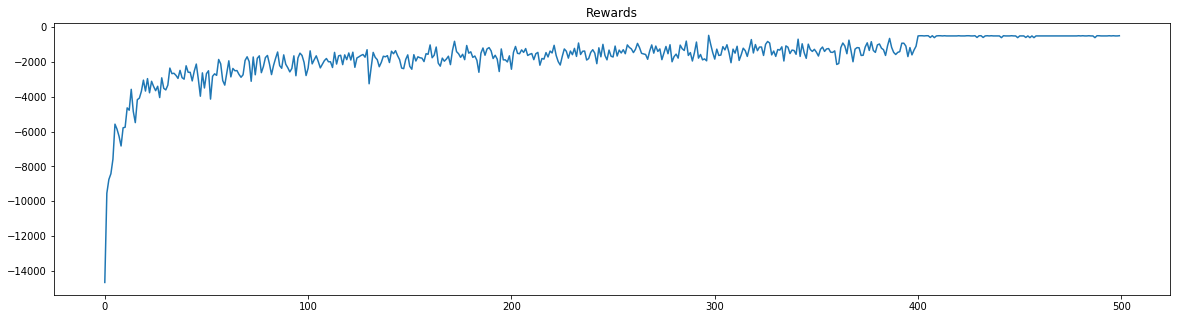

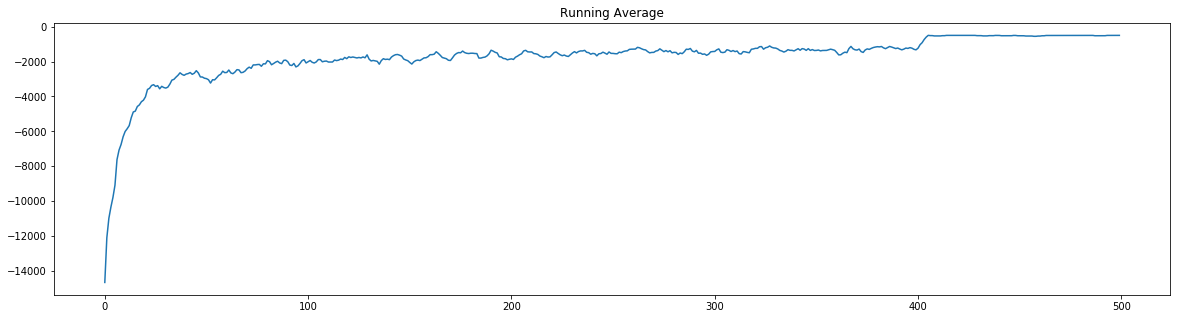

In [19]:
import gym
import gym_tiger
import matplotlib.pyplot as plt
from experiments.qlearning.basic.utils import play_one, plot_running_avg
from experiments.qlearning.basic.qlearner_obs_seq.qlearner_obs_seq \
    import QLearnerObsSeq
from experiments.qlearning.basic.qlearner_obs_seq.feature_transformer \
    import SeqFeatureTransformer

env = gym.make('Tiger-v0')
env.__init__(reward_tiger=-100, reward_gold=10, reward_listen=-1,
             max_steps_per_episode=500)

seq_len=3

ft = SeqFeatureTransformer()

model = QLearnerObsSeq(env, ft, initial_alpha=.5, gamma=.9, alpha_decay=.4,
                       seq_len=seq_len)

eps = 1
n = 0
done = False
ot = env.reset()

N = 500
totalrewards = np.empty(N)
for n in range(N):
    if n >= N - (N/5):
        eps = 0
    else:
        eps = 1.0/np.sqrt(n+1)
    totalreward = play_one(env, model, eps)
    totalrewards[n] = totalreward
    if n % (N/5) == 0:
        print(str(model))

print("avg reward for last {} episodes:".format(N/5),
      totalrewards[int(-1*(N/5)):].mean())

fig, ax = plt.subplots(1, 1, figsize=(20, 5))
ax.plot(totalrewards)
ax.set_title("Rewards")

plot_running_avg(totalrewards, window=5)

# TwoInARow-v0

avg reward for last 20.0 episodes: 99.2


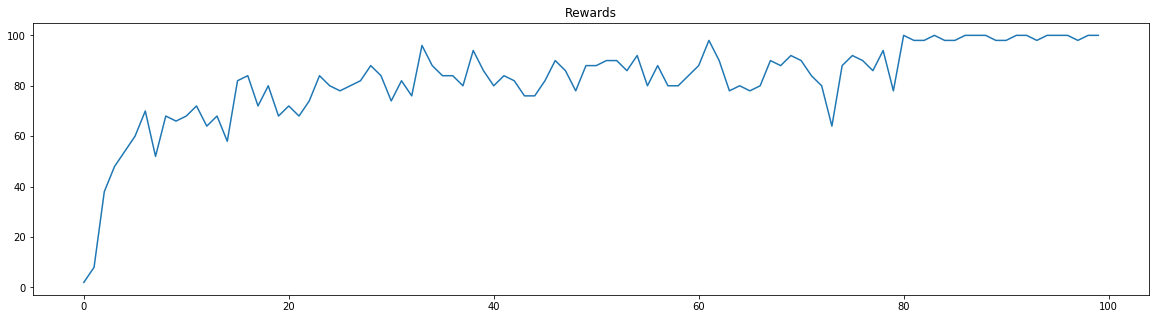

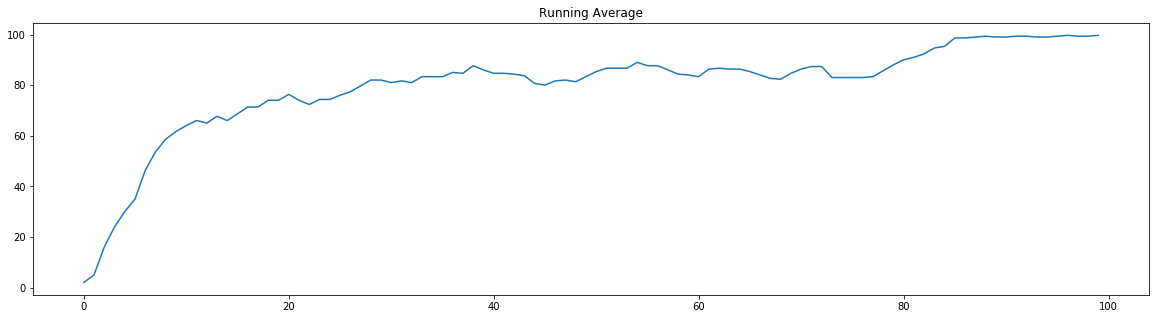

In [4]:
import gym
import gym_dummy
import matplotlib.pyplot as plt
from experiments.qlearning.basic.utils import play_one, plot_running_avg
from experiments.qlearning.basic.qlearner_obs_seq.qlearner_obs_seq \
    import QLearnerObsSeq
from experiments.qlearning.basic.qlearner_obs_seq.feature_transformer \
    import SeqFeatureTransformer

env = gym.make('TwoInARow-v0')
ft = SeqFeatureTransformer()
model = QLearnerObsSeq(env, ft, initial_alpha=.5, gamma=.9, alpha_decay=.4,
                       seq_len=2, translate=False)
eps = 1
n = 0
done = False
ot = env.reset()

N = 100
totalrewards = np.empty(N)
for n in range(N):
    if n >= N - (N/5):
        eps = 0
    else:
        eps = 1.0/np.sqrt(n+1)
    totalreward = play_one(env, model, eps)
    totalrewards[n] = totalreward

print("avg reward for last {} episodes:".format(N/5),
      totalrewards[int(-1*(N/5)):].mean())

fig, ax = plt.subplots(1, 1, figsize=(20, 5))
ax.plot(totalrewards)
ax.set_title("Rewards")

plot_running_avg(totalrewards, window=5)

In [13]:
display(model.last_n_obs)
model.predict([1])

[[0], [0]]

array([ 0.25381239, -1.88289797])